In [4]:
%matplotlib notebook
import genetic
import functions
import matplotlib.pyplot as plt
import numpy as np

def showResults(best_species, population, func):
    print("Best point: ", pop, ", F(x)=", func(pop), ", i = " , iters)

    base, zoomed, ranges = plots(best_species[-1])
    if (func != functions.__first):
        # Plotting base
        for p in population:
            base.plot(p[0], p[1], 'wo')
        for p in best_species:
            base.plot(p[0], p[1], 'bo')
        base.plot(pop[0], pop[1], 'ro')
        
        population = list(filter(lambda x: x[0] > ranges[0] and x[0] < ranges[1] and x[1] > ranges[2] and x[1] < ranges[3], population))
        best_species = list(filter(lambda x: x[0] > ranges[0] and x[0] < ranges[1] and x[1] > ranges[2] and x[1] < ranges[3], best_species))

        # Plotting zoomed 
        for p in population:
            zoomed.plot(p[0], p[1], 'wo')
        for p in best_species:
            zoomed.plot(p[0], p[1], 'bo')
        zoomed.plot(pop[0], pop[1], 'ro')
    else:
        # Plotting base
        for p in population:
            base.plot(p[0], func(p), 'go')

        base.plot(pop[0], func(pop), 'ro')

        population = list(filter(lambda x: x[0] > ranges[0] and x[0] < ranges[1], population))

        # Plotting zoomed
        for p in population:
            zoomed.plot(p[0], func(p), 'go')

        zoomed.plot(pop[0], func(pop), 'ro')
    plt.show()
    
    
functions_sample = [[functions.first(), "FIRST"], [functions.third(), "THIRD"],
                    [functions.fifth(), "FIFTH"], [functions.eighth(), "EIGHTH"], [functions.twelfth(), "TWELFTH"]]
crossover_sample = [[genetic.two_point_crossover, "TWO_POINT"], [genetic.uniform_crossover, "UNIFORM"]]
selection_sample = [[genetic.roulette_selection, "ROULETTE"], [genetic.tournament_selection, "TOURNAMENT"]]


# PARAMETERS TABLE

|Option | parameter name      | example                                                                                        |
|-------|---------------------|------------------------------------------------------------------------------------------------|
|FUNCTION|function_to_optimize|functions.first(), functions.third(), functions.fifth(), functions.eighth(), functions.twelfth()|
|CROSSOVER|crossover_func     |genetic.two_point_crossover, genetic.uniform_crossover                                          |
|SELECTION|selection_func     |genetic.roulette_selection, genetic.tournament_selection                                        |
|MUTATION |mutation_func      |genetic.mutate                                                                                  |
|MUTATION_P|mutation_probability|$$0 \leqslant x \leqslant 0.1$$                                                               |
|CROSSOVER_P|crossover_probability|$$0 \leqslant x \leqslant 1$$                                                               |


## Tournament selection + uniform crossover

Average iterations:  0.6333333333333333
Best point:  [0.6988357222258589] , F(x)= 0.008161258176499464 , i =  2


<IPython.core.display.Javascript object>


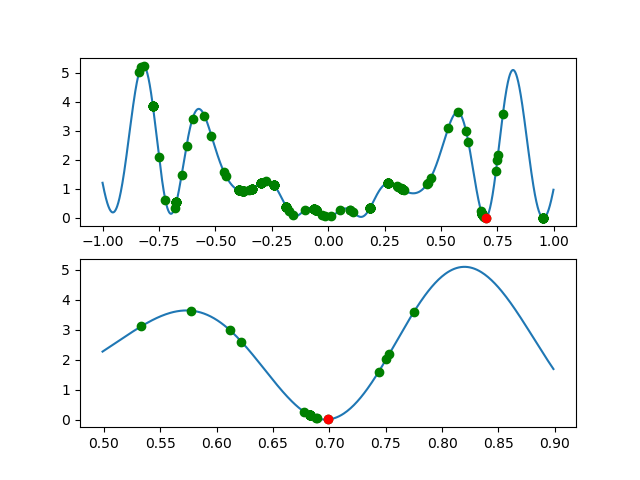

Average iterations:  3.7
Best point:  [-0.00017669223864142866, 0.011573693049861087] , F(x)= 0.0001848933706396494 , i =  27


<IPython.core.display.Javascript object>


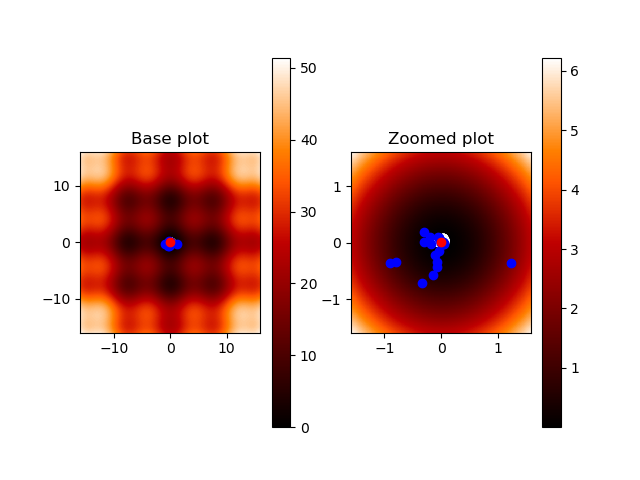

Average iterations:  7.566666666666666
Best point:  [0.8455968066846347, 0.6860677428105605] , F(x)= 0.10774451689256379 , i =  17


<IPython.core.display.Javascript object>


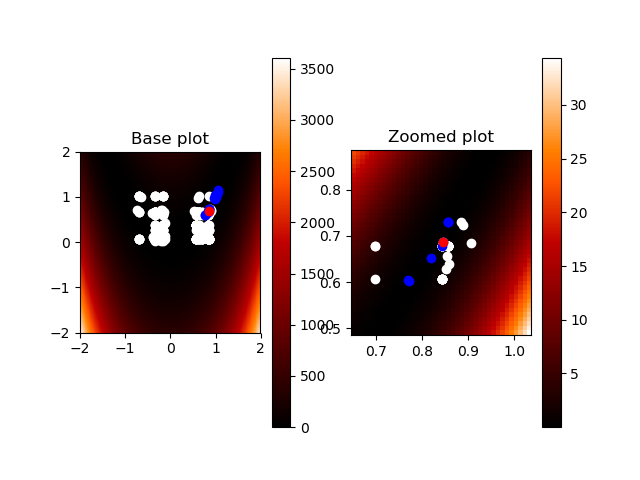

Average iterations:  76.93333333333334
Best point:  [-8.561031200966676, 6.899745102672548] , F(x)= 4.4586915076618686e-08 , i =  21


<IPython.core.display.Javascript object>


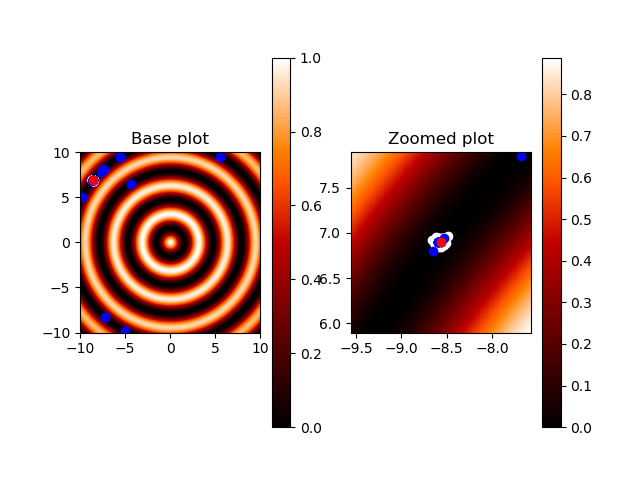

Average iterations:  1.9
Best point:  [0.021472911270041646, 0.16588240205149338] , F(x)= 0.008519808834488052 , i =  13


<IPython.core.display.Javascript object>


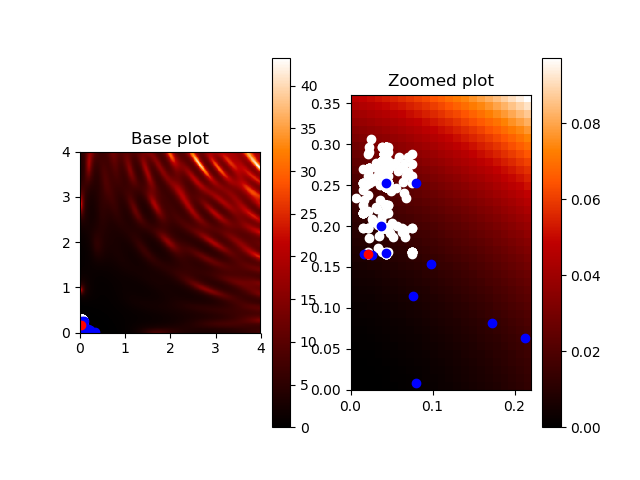

In [2]:
for function in functions_sample:

    FUNCTION = function
    CROSSOVER = genetic.uniform_crossover
    SELECTION = genetic.tournament_selection
    MUTATION = genetic.mutate
    MUTATION_PROBABILITY = 0.1
    CROSSOVER_PROBABILITY = 0.5
    INITIAL_POPULATION = 100
    POPULATION_LIMIT = 30
    PRECISION = 1e-2

    func, dimension, ranges, plots = FUNCTION

    itersSum = 0
    for i in range(5):
        pop, population, best_species, iters = genetic.gen_alg(crossover_func=CROSSOVER, mutation_func=MUTATION, selection_func=SELECTION,
                                    func_to_optimize=func, dimension=dimension, function_ranges=ranges,
                                    crossover_probability=CROSSOVER_PROBABILITY, mutation_pobability=MUTATION_PROBABILITY,
                                    initial_population=INITIAL_POPULATION, 
                                    population_limit=POPULATION_LIMIT, precision=PRECISION)
        itersSum = itersSum + iters

    print("Average iterations: ", itersSum/30)
    showResults(best_species, population, func)

In [5]:



def buildTestTree(number_of_iterations):
    results = []
    for function in functions_sample:

        crossovers = []

        for crossover in crossover_sample:
            selections = []

            for selection in selection_sample:

                func, dimension, ranges, plots = function[0]

                values = []
                iterations = []

                for i in range(number_of_iterations):
                    pop, population, best_species, iters = genetic.gen_alg(crossover_func=crossover[0], selection_func=selection[0],
                                                mutation_func=genetic.mutate,
                                                func_to_optimize=func, dimension=dimension, function_ranges=ranges)
                    values.append(func(best_species[-1]))
                    iterations.append(iters)

                selections.append([selection[1], sum(values) / float(len(values)), sum(iterations) / float(len(iterations))])
                print("F: ", function[1], "C: ", crossover[1], "S: ", selection[1], "Average: ", sum(values) / float(len(values)))

            crossovers.append([crossover[1], selections])

        results.append([function[1], crossovers])
    return results


def parseResultsTree(tree):
    functions = []
    crossovers = []
    selections = []
    results = []
    iters = []  
    
    for i in tree:
        functions.append(i[0])
        
        crossover_vals = []
        
        for j in i[1]:
            crossovers.append(j[0])
            
            selection_vals = []
            for k in j[1]:
                selections.append(k[0])
                
                selection_vals.append(k[1])
                iters.append(k[2])
                
            crossover_vals.append(selection_vals)
            
        results.append(crossover_vals)
        
    return functions, crossovers[:len(crossover_sample)], selections[:len(selection_sample)], results

results = buildTestTree(1)
functions, crossovers, selections, results = parseResultsTree(results)



    

F:  FIRST C:  TWO_POINT S:  ROULETTE Average:  0.008485651406930122
F:  FIRST C:  TWO_POINT S:  TOURNAMENT Average:  0.017139065781734054
F:  FIRST C:  UNIFORM S:  ROULETTE Average:  0.018324922502290054
F:  FIRST C:  UNIFORM S:  TOURNAMENT Average:  0.006592834172902169
F:  THIRD C:  TWO_POINT S:  ROULETTE Average:  0.0004888012086912141
F:  THIRD C:  TWO_POINT S:  TOURNAMENT Average:  0.09439454918426016
F:  THIRD C:  UNIFORM S:  ROULETTE Average:  2.999521164781527e-08
F:  THIRD C:  UNIFORM S:  TOURNAMENT Average:  0.00036138202292068655
F:  FIFTH C:  TWO_POINT S:  ROULETTE Average:  0.03863764099101076
F:  FIFTH C:  TWO_POINT S:  TOURNAMENT Average:  0.029966026397249563
F:  FIFTH C:  UNIFORM S:  ROULETTE Average:  0.026728102557832915
F:  FIFTH C:  UNIFORM S:  TOURNAMENT Average:  0.12820352249145067
F:  EIGHTH C:  TWO_POINT S:  ROULETTE Average:  3.119594078173231e-06
F:  EIGHTH C:  TWO_POINT S:  TOURNAMENT Average:  4.27356453071851e-05
F:  EIGHTH C:  UNIFORM S:  ROULETTE Averag

In [116]:
from ipywidgets import *
import pandas as pd

def highlight_min(data, color='yellow'):
    
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_min = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)
    
dfs = [pd.DataFrame(results[i], columns=selections, index=crossovers) for i in range(len(functions))]
df = pd.concat(dfs, keys=functions)

style = df.style
for i in range(len(functions)):
    style = style.apply(highlight_min, subset=pd.IndexSlice[functions[i], selections[0:2]], axis=None)

style
